         ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
Naive Bayes Specificity: 87.62%
Gradient Boosting Specificity: 89.81%


C:\Users\ashiv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ashiv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ashiv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\ashiv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_d

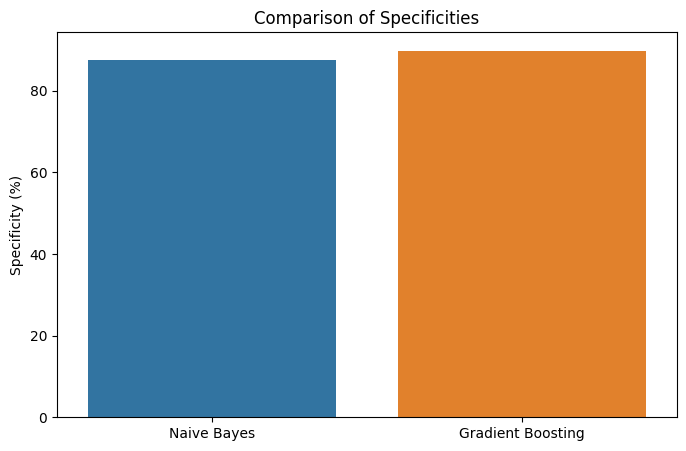

Naive Bayes Specificity: 87.62%
Gradient Boosting Specificity: 89.81%


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming your dataset is in a CSV file named 'water_quality_dataset.csv'
dataset_path = 'C:/Users/ashiv/OneDrive/Desktop/water/groundwater_data.csv'
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print(df.head())

# Handle missing values (NaN) using mean imputation
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into features and target
X = df_imputed.drop('Potability', axis=1)
y = df_imputed['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_scaled, y_train)
naive_bayes_predictions = naive_bayes_model.predict(X_test_scaled)

# Gradient Boosting model (XGBoost)
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train_scaled, y_train)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test_scaled)

# Calculate confusion matrices for both models
naive_bayes_conf_matrix = confusion_matrix(y_test, naive_bayes_predictions)
gradient_boosting_conf_matrix = confusion_matrix(y_test, gradient_boosting_predictions)

# Calculate specificity from confusion matrices
naive_bayes_specificity = naive_bayes_conf_matrix[0, 0] / (naive_bayes_conf_matrix[0, 0] + naive_bayes_conf_matrix[0, 1]) * 100
gradient_boosting_specificity = gradient_boosting_conf_matrix[0, 0] / (gradient_boosting_conf_matrix[0, 0] + gradient_boosting_conf_matrix[0, 1]) * 100

# Compare specificities
print(f"Naive Bayes Specificity: {naive_bayes_specificity:.2f}%")
print(f"Gradient Boosting Specificity: {gradient_boosting_specificity:.2f}%")

# Create a bar plot to compare specificities
specificity_data = {'Naive Bayes': naive_bayes_specificity, 'Gradient Boosting': gradient_boosting_specificity}
plt.figure(figsize=(8, 5))
sns.barplot(x=list(specificity_data.keys()), y=list(specificity_data.values()))
plt.title('Comparison of Specificities')
plt.ylabel('Specificity (%)')
plt.show()
print(f"Naive Bayes Specificity: {naive_bayes_specificity:.2f}%")
print(f"Gradient Boosting Specificity: {gradient_boosting_specificity:.2f}%")